In [1]:
import numpy as np
from scipy import stats

### 1. Mimic sample mean distribution when we take sample 5000 times

In [34]:
# Based on central limit theorem, if we take sample many times (5000 times), 
# the sample mean will follow normal distribution no matter what population distribution is.
# Therefore, we could mimic the sample mean distribution through defining Gaussian distributed data (size=5000)
# Assume population mean=2 and variance=1.
import matplotlib.pyplot as plt
N=5000
p = np.random.randn(N) + 2

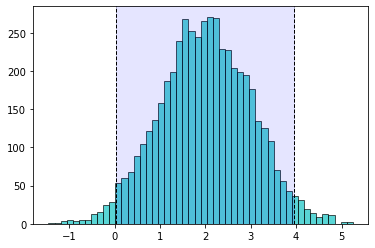

In [31]:
# If we take one sample, there is 95% chance that the sample will fall in a range of population mean+=1.96*population std
# As highligted below
fig, ax = plt.subplots()
plt.hist(p, bins=50, color='c', edgecolor='k', alpha=0.65)
plt.axvline(2+(-1.96)*1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(2+1.96*1, color='k', linestyle='dashed', linewidth=1)
ax.axvspan(2+(-1.96)*1, 2+1.96*1, alpha=0.1, color='blue')
plt.show()

### 2. But in reality, we only take sample once

In [62]:
# Assume the sample size=20
from random import sample
s=sample(list(p),20)

In [72]:
# Calculate sample mean and sample standard deviation
s_mean=np.mean(s)
s_std=np.std(s)

In [65]:
# The sample mean is 2.16
s_mean

2.1643401931620057

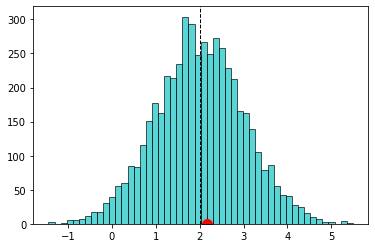

In [66]:
# The line is the real mean while the red dot in x-axis is the sample mean
plt.hist(p, bins=50, color='c', edgecolor='k', alpha=0.65)
plt.plot(s_mean, 0, 'ro', ms=10)
plt.axvline(2, color='k', linestyle='dashed', linewidth=1)
plt.show()

### 3. Calculate the confidence interval

In [96]:
# Because most times we do not know population variance
# Therefore, we should use t-score and sample std to calculate confidence interval

In [101]:
# Step 1: Calculate t-score (95% confidence interval, degree of freedom=n-1=19)
t_score=stats.t.ppf(0.975, df=19, loc=s_mean, scale=s_std)

In [102]:
# Step 2: Get confidence interval
ci=[s_mean-t_score*s_std, s_mean+t_score*s_std]

In [103]:
# Have a look of the confidence interval
print(ci)

[-1.158636619068556, 5.487317005392567]


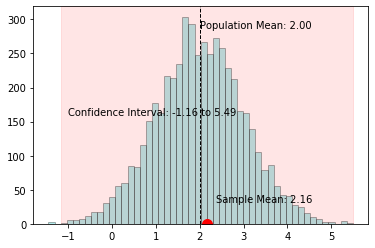

In [104]:
# Let's put sample mean distribution, population mean, sample mean, confidence interval on the same graph
fig, ax = plt.subplots()
plt.hist(p, bins=50, color='c', edgecolor='k', alpha=0.3)
plt.plot(s_mean, 0, 'ro', ms=10)
plt.axvline(2, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(2, max_ylim*0.9, 'Population Mean: {:.2f}'.format(2))
plt.text(s_mean*1.1, max_ylim*0.1, 'Sample Mean: {:.2f}'.format(s_mean))
ax.axvspan(ci[0], ci[1], alpha=0.1, color='red')
plt.text(-1, max_ylim*0.5, f'Confidence Interval: {round(ci[0],2)} to {round(ci[1],2)}')
plt.show()